# Trojan Horse Optic 2

In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
from ionization import ionization
from lens import profile
from lens import design
import matplotlib.pyplot as plt
plt.style.use('notes')

path = '/media/robert/Data_Storage/Data/Experimental/Trojan_Horse/TH_2/'
lam = 0.796
# All length units are in um

Second test for the Trojan Horse plasma source. Increase the initial Bessel width significantly from the first test (now 150um). The rest stays the same: 10cm long plasma placed as close to the end of the picnic basket as possible and no detailed ramp design. The goal is to determine if it is possible to ionize the plasma source in the picnic basket. The most likely limiting factor is optical damage to the holed mirror directly before the plasma.

The gas species is assumed to be Argon. This notebook calculates the plasma density for different gas densities and laser powers. The intensity at the holed mirror is also calculated.

If the final mirror before the plasma is placed as far upstream as possible, there is almost exactly 1m from the mirror to the edge of the picnic basket.

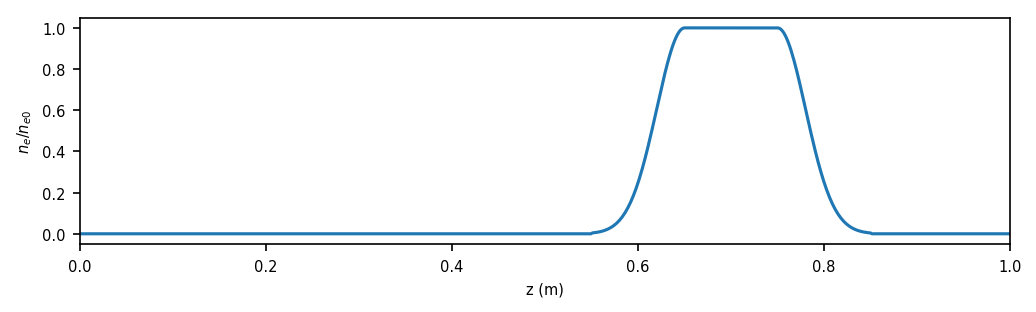

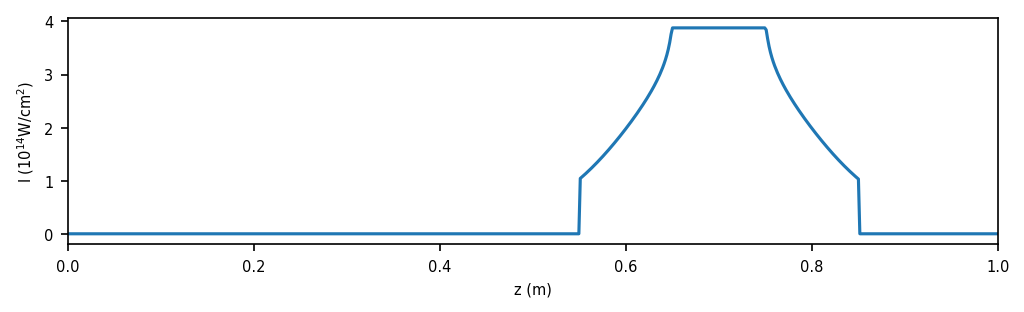

Plasma starts at 0.41m and ends at 0.99m


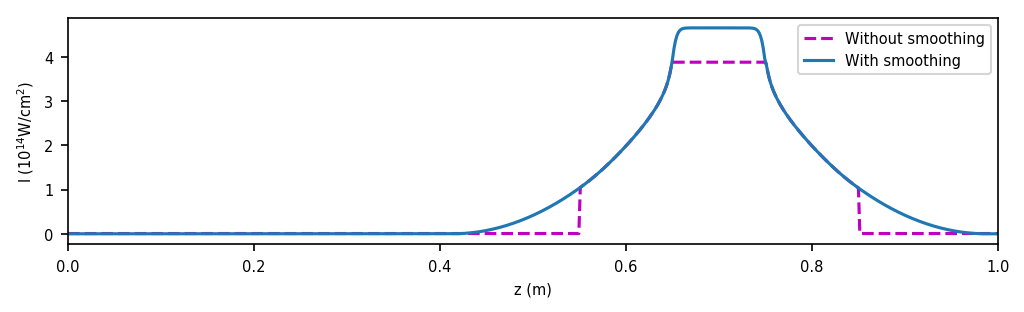

In [2]:
length = 10e4
width = 150
Nz = 2**16
Z = 100e6
z0 = 65e4
xlim = [0, 1]
tau = 30 # RMS pulse length in fs
Ar = {'atom' : ionization.Ar,
      'tau' : tau,
      'type' : 'gaussian'}
n = lambda z: ne0/1e17 # Background gas density
z, I_la = profile.cutoff_gaussian_intensity(Nz, Z, z0, length, 10e4, 3e4, 10e4, 3e4, Ar, 8, 0.4, path, xlim)

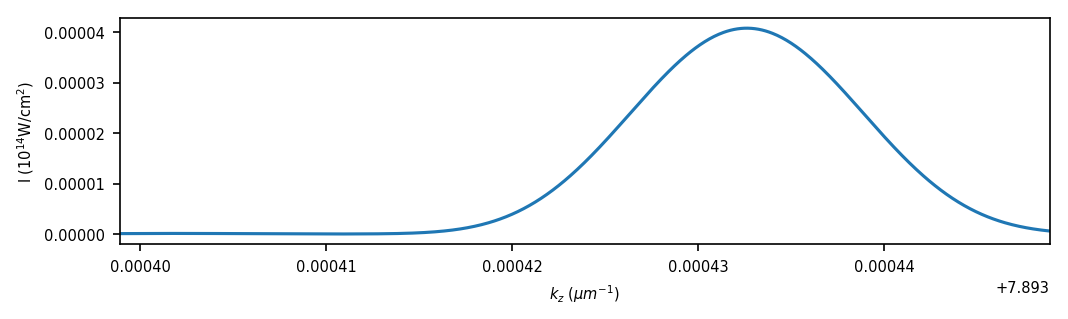

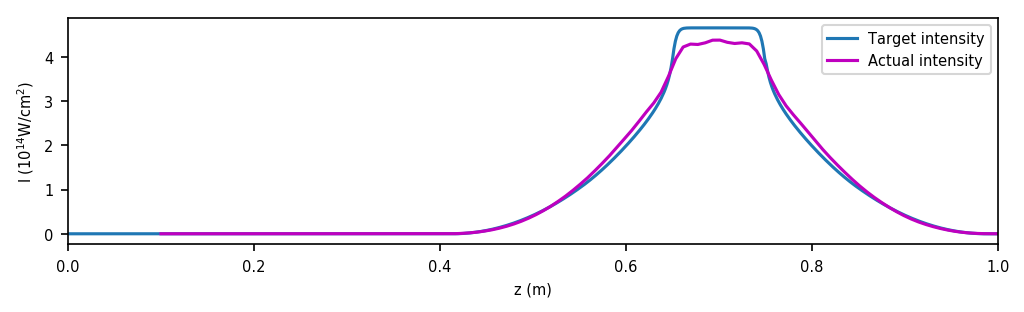

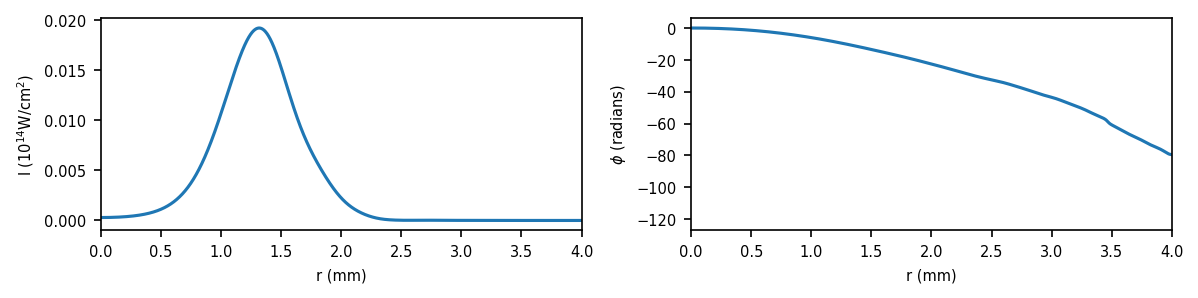

In [3]:
r, E = design.calculate_tran_field(z, I_la, 5e3, width, lam, path, 5e-5, xlim, [0, 4])

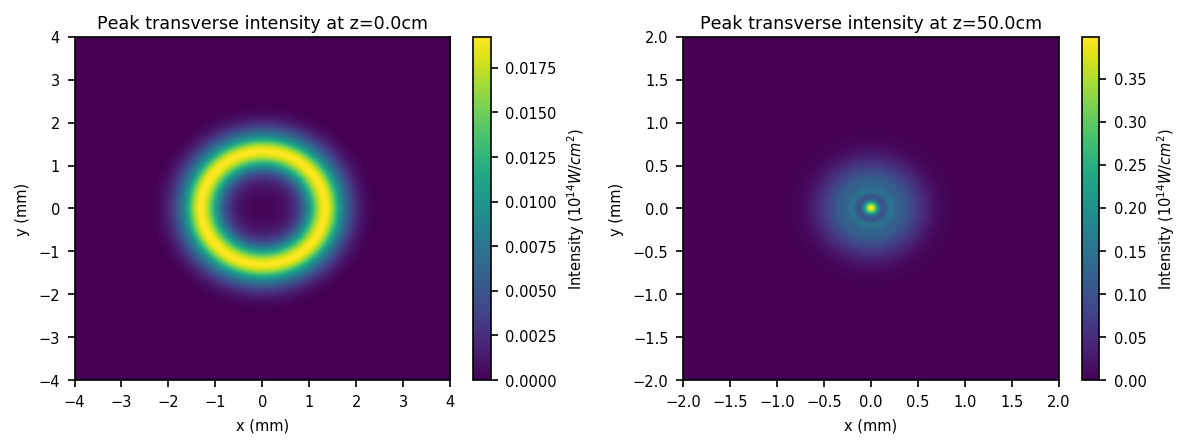

In [4]:
X = 8e3
Nx = 2**12
start = 50e4
beam0, pulseParams = design.propagate_to_start(r, E, start, X, Nx, path, lam, tau, 4, [-2, 2])

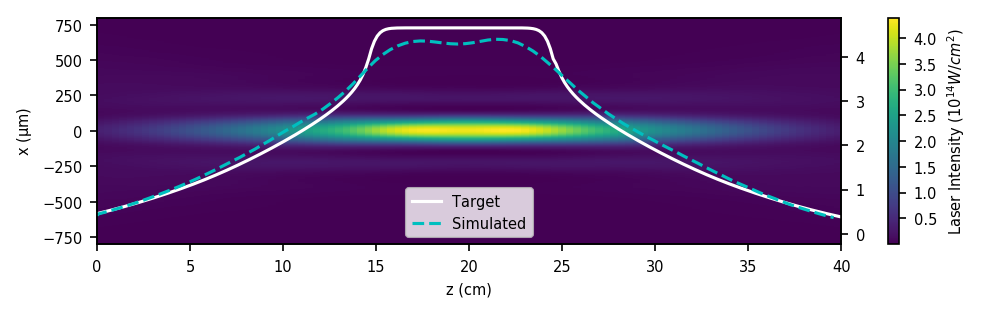

In [5]:
Nx = 2**10
Nz = 100
X = 2.5e3
Z = 40e4
design.domain_test(X, Nx, Z, Nz, beam0, pulseParams, z, I_la, start, [-800, 800])

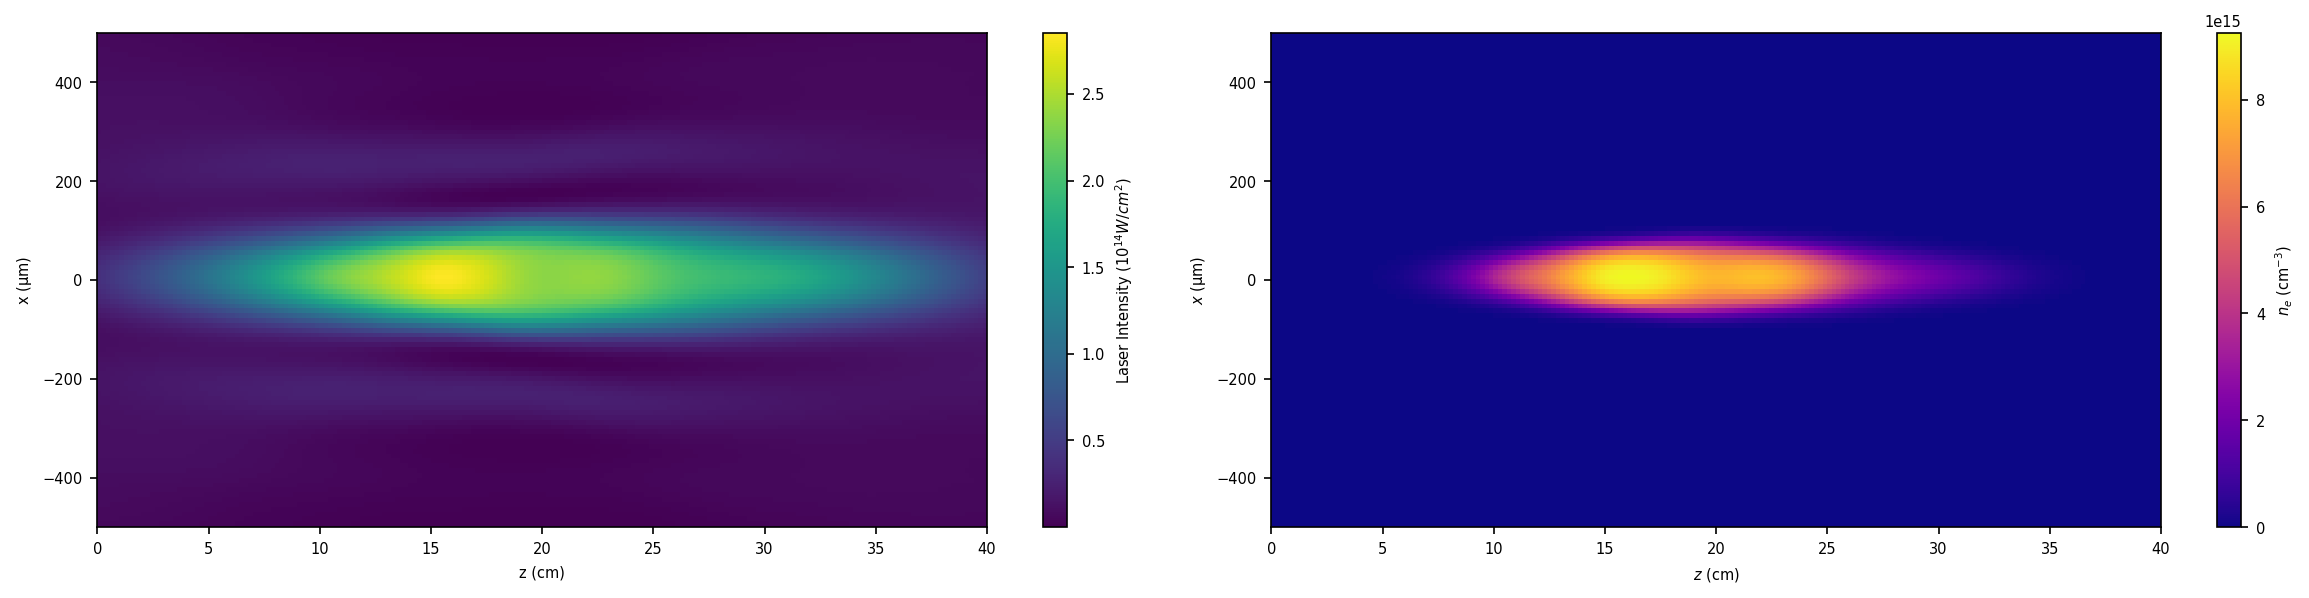

In [6]:
ne0 = 1e16
Nx = 2**8
Nz = 200
ext = [0, Z/1e4, -X/2, X/2]
pulse, I, ne = design.plasma_refraction(X, Nx, Z, Nz, beam0, pulseParams, ionization.Ar, n, start, 1)
design.plot_laser_plasma(I, ne, ext)

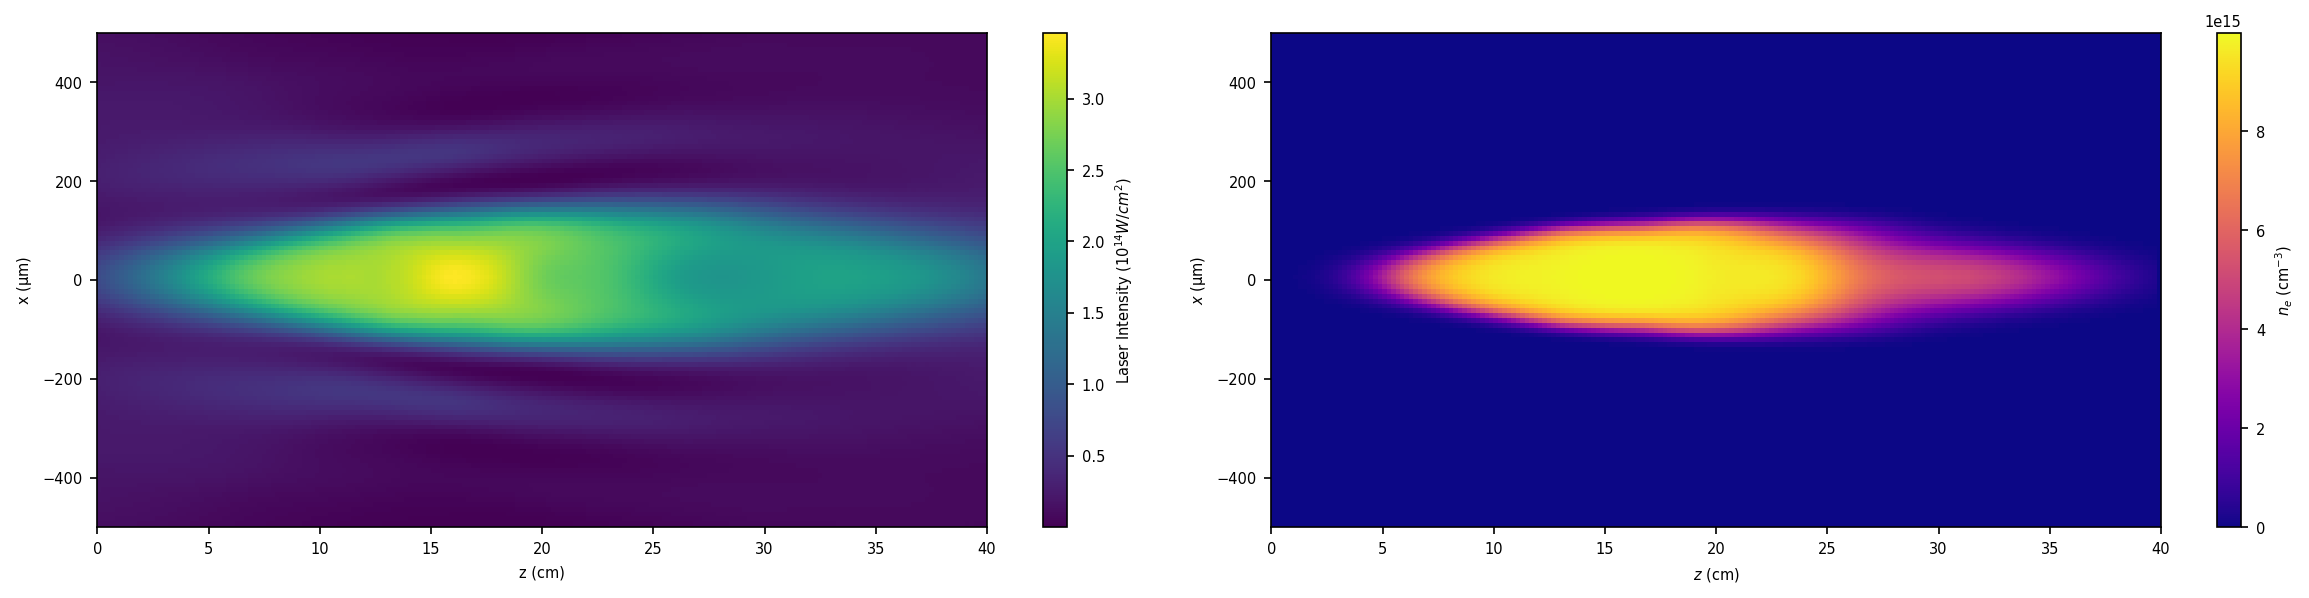

In [7]:
pulse, I, ne = design.plasma_refraction(X, Nx, Z, Nz, beam0, pulseParams, ionization.Ar, n, start, 2)
design.plot_laser_plasma(I, ne, ext)

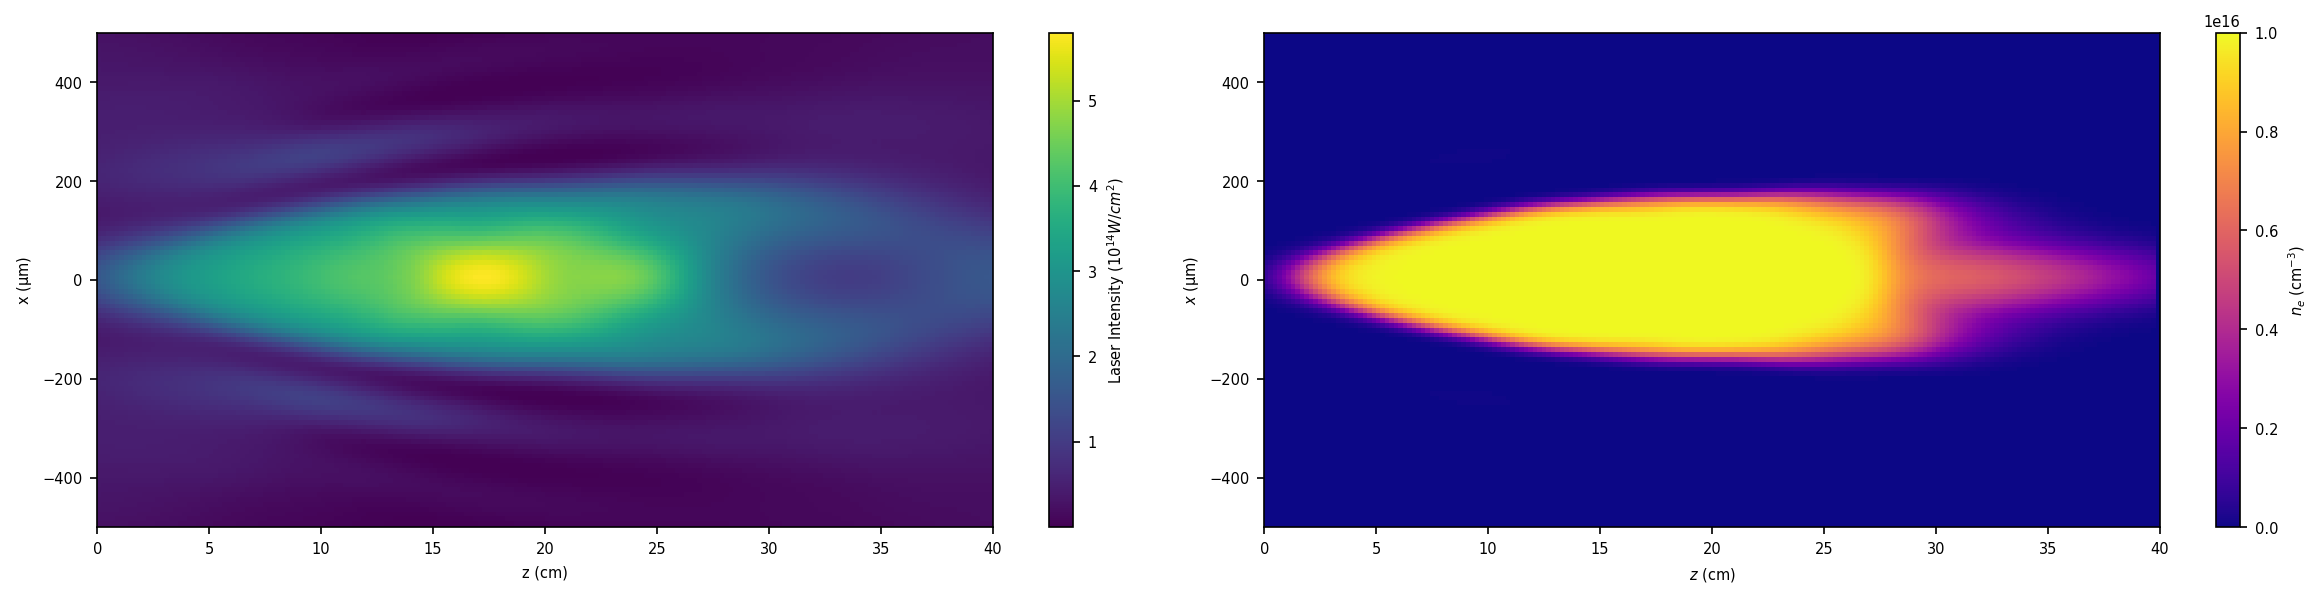

In [8]:
pulse, I, ne = design.plasma_refraction(X, Nx, Z, Nz, beam0, pulseParams, ionization.Ar, n, start, 4)
design.plot_laser_plasma(I, ne, ext)

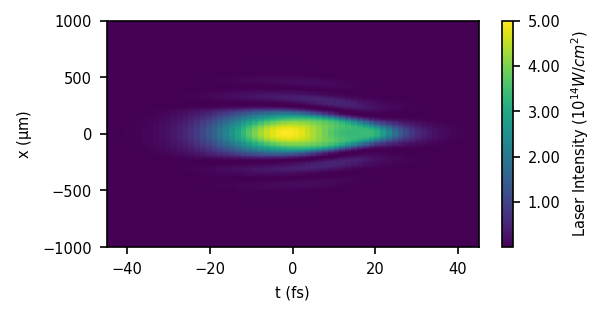

Frame 30 completed
Frame 60 completed
Frame 90 completed
Frame 120 completed
Frame 150 completed
Frame 180 completed


In [9]:
design.plot_pulse(pulse, 100, [-1000, 1000], False)
design.pulse_evolution(pulse, '150um_4XEnergy_1e16', [-500, 500], False)

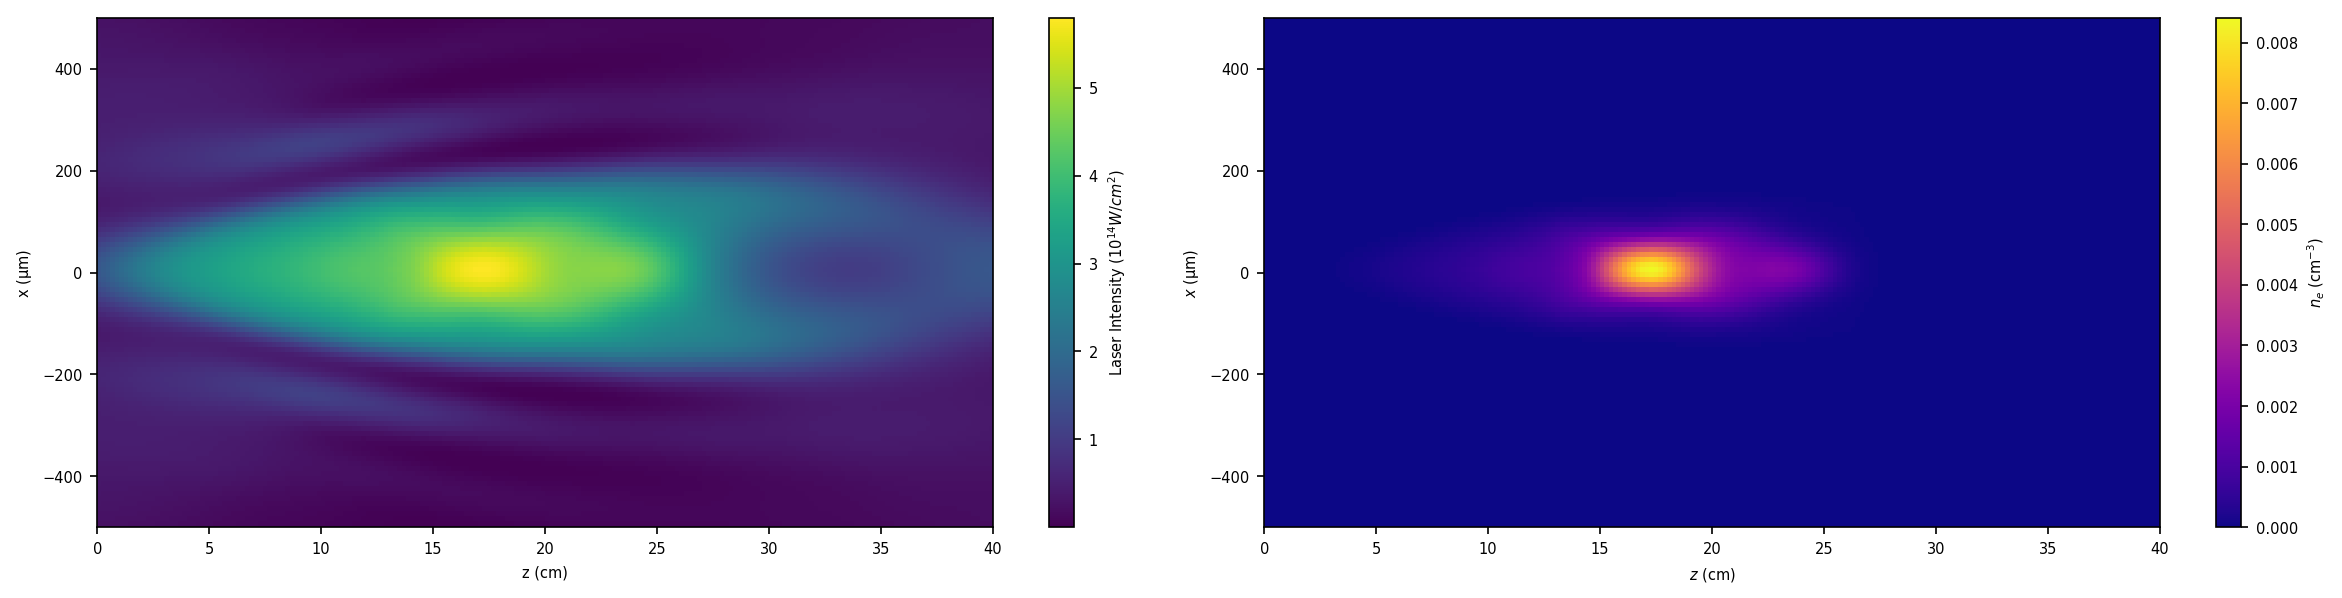

In [16]:
# Look at the ionization of Helium to make sure it isn't ionizing - rough estimate should over ionize
from ionization import adk
e = np.zeros((Nz, Nx), dtype='double')
for i in range(Nz):
    e[i, :] = np.amax(abs(pulse.load_field(i)[0]), axis=0)
atom = ionization.He
ne = adk.gaussian_frac(atom['EI'], e, tau, atom['Z'], atom['l'], atom['m'])
design.plot_laser_plasma(I, ne, ext)

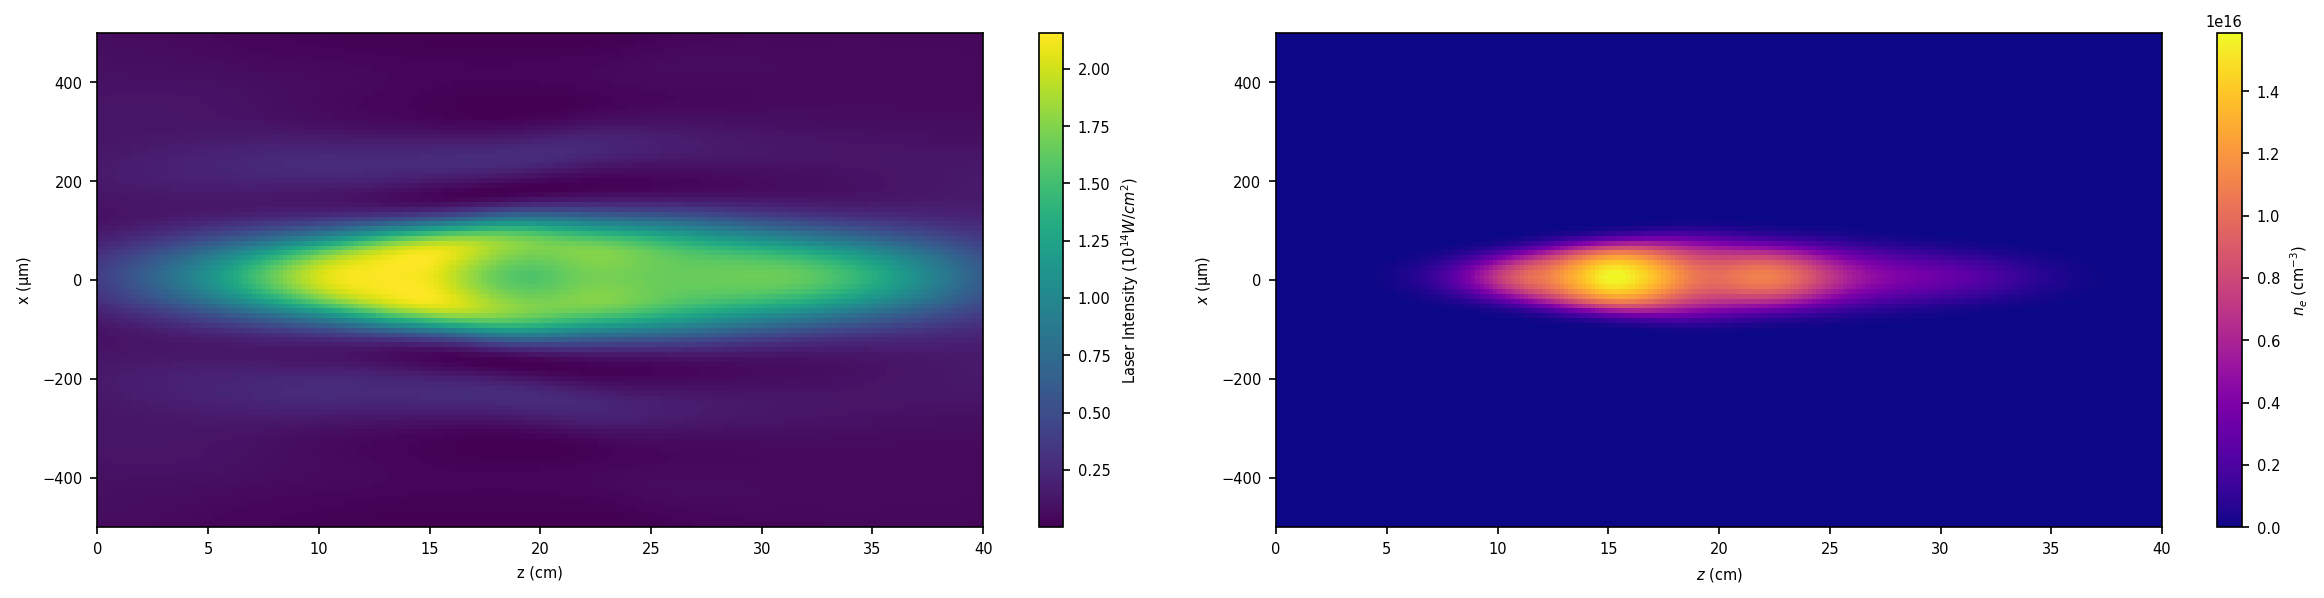

In [13]:
ne0 = 2.5e16
pulse, I, ne = design.plasma_refraction(X, Nx, Z, Nz, beam0, pulseParams, ionization.Ar, n, start, 1)
design.plot_laser_plasma(I, ne, ext)

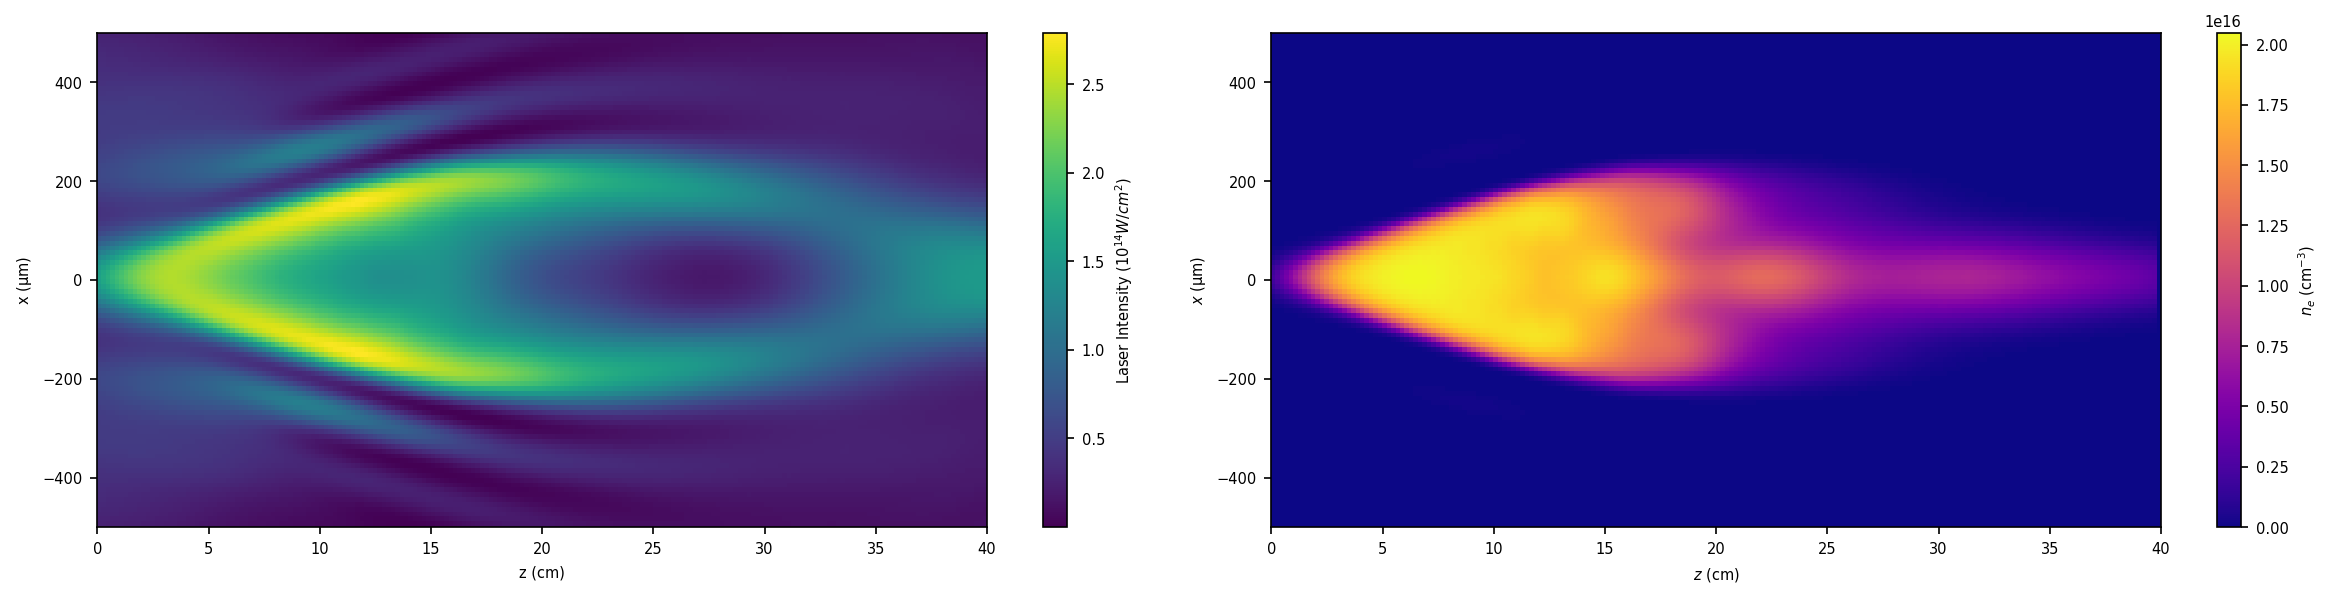

In [14]:
pulse, I, ne = design.plasma_refraction(X, Nx, Z, Nz, beam0, pulseParams, ionization.Ar, n, start, 4)
design.plot_laser_plasma(I, ne, ext)